In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
file_path='/content/drive/MyDrive/TrueFoundry/airline_sentiment_analysis.csv'

In [ ]:
import pandas as pd 
class reader(): #class for reading the training data
  def __init__(self):
    self.df=pd.read_csv(file_path)
  def restructure(self):
    res=self.df.drop(['Unnamed: 0'], axis=1)
    columns_titles = ["text","airline_sentiment"]
    res=res.reindex(columns=columns_titles)
    return res

In [ ]:
read=reader()
df=read.restructure()
df.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
from sklearn.utils import resample,shuffle
df_1 = df[df['airline_sentiment'] == 'positive']
other_df = df[df['airline_sentiment'] == 'negative']
df_1_upsampled = resample(df_1,n_samples=10000,random_state=40)
df = pd.concat([df_1_upsampled,other_df])
print(df['airline_sentiment'].value_counts())
df.head(3)

positive    10000
negative     9178
Name: airline_sentiment, dtype: int64


,text,airline_sentiment
10640,@AmericanAir thanks. They did not charge anyth...,positive
9348,@AmericanAir I was happy to purchase the upgra...,positive
10219,@AmericanAir SFO. Natt (the agent who helped m...,positive


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() #binary label 1: positive, 0: negative
df['airline_sentiment']= label_encoder.fit_transform(df['airline_sentiment'])
df.head(3)

,text,airline_sentiment
10640,@AmericanAir thanks. They did not charge anyth...,1
9348,@AmericanAir I was happy to purchase the upgra...,1
10219,@AmericanAir SFO. Natt (the agent who helped m...,1


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
import re
import string
import nltk

def cleaning_mentions(text):
  return re.sub("@[A-Za-z0-9_]+","", text)
df['text'] = df['text'].apply(lambda x: cleaning_mentions(x))

def cleaning_non_alpha(text):
  return re.sub("[^a-z0-9]"," ", text)
df['text'] = df['text'].apply(lambda x: cleaning_non_alpha(x))

STOPWORDS = set(stopwordlist) #cleaning stopwords
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))

def cleaning_URLs(data): #cleaning URLs (if any)
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ', data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))

english_punctuations = string.punctuation #removing punctuations
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text'] = df['text'].apply(lambda x: cleaning_punctuations(x))

def cleaning_repeating_char(text): #removing repeating characters
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))

def cleaning_numbers(data): #removing numbers
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))

st = nltk.PorterStemmer() #stemming is generally more suitable for sentiment analysis problems
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: stemming_on_text(x))

# from nltk.stem import WordNetLemmatizer
# wordnet_lemmatizer = WordNetLemmatizer()
# def lemmatizer(text):
#   lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
#   return lemm_text
# df['text'] = df['text'].apply(lambda x:lemmatizer(x))

df.head(3)

,text,airline_sentiment
10640,thanks hey not charge anything end good,1
9348,happy purchase upgrade f avail next flight,1
10219,att agent helped really awesome job,1


In [ ]:
df=df.sample(frac=1)
df.head()

,text,airline_sentiment
11092,coming next catching home et get another gre...,1
9139,right p p amp away,1
9054,flying high thanks,1
11298,yes called number skype well worth recommend ...,1
7985,thank,1


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 27.9 MB/s 
     |████████████████████████████████| 163 kB 68.9 MB/s 
     |████████████████████████████████| 7.6 MB 52.3 MB/s 


In [ ]:
import transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

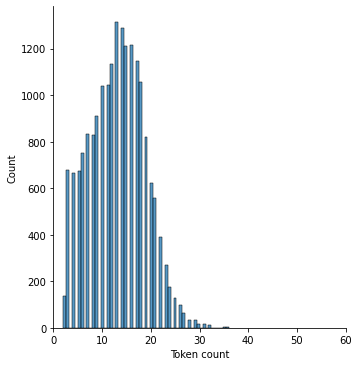

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
tokens = [len(tokenizer.encode(text, max_length=512, truncation=True)) for text in df.text]
sns.displot(tokens)
plt.xlim([0, 60]);
plt.xlabel('Token count'); #token_count=40

In [ ]:
from torch.utils.data import Dataset, DataLoader

# Define a custom dataset, more info on how to build custom dataset can be 
# found at https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
class CustomDataset(Dataset):
    
    def __init__(
        self, 
        tweets, 
        labels, 
        tokenizer, 
        max_length
    ):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.tweets)
    
    def __getitem__(self, idx):
        tweet = self.tweets[idx]
        label = self.labels[idx]
        
        tokenize = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'tweet': tweet,
            'input_ids': tokenize['input_ids'].flatten(),
            'attention_mask': tokenize['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long)
               }

In [ ]:
from sklearn.model_selection import train_test_split
MAX_LENGTH = 40 #token_count
TEST_SIZE = 0.1
VALID_SIZE = 0.1
BATCH_SIZE = 16
NUM_WORKERS = 2
RANDOM_STATE=42

train_sampler, test_sampler = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE)
valid_sampler, test_sampler = train_test_split(test_sampler, test_size=VALID_SIZE, random_state=RANDOM_STATE)

train_set = CustomDataset(
    train_sampler['text'].to_numpy(),
    train_sampler['airline_sentiment'].to_numpy(),
    tokenizer, 
    MAX_LENGTH
)
test_set = CustomDataset(
    test_sampler['text'].to_numpy(),
    test_sampler['airline_sentiment'].to_numpy(),
    tokenizer, 
    MAX_LENGTH
)
valid_set = CustomDataset(
    valid_sampler['text'].to_numpy(), 
    valid_sampler['airline_sentiment'].to_numpy(), 
    tokenizer, 
    MAX_LENGTH
)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
valid_loader = DataLoader(valid_set, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

In [ ]:
from torch import nn
MODEL = 'bert-base-uncased'
from transformers import BertModel
class AirlineSentimentClassifier(nn.Module):
    
    def __init__(self, num_labels):
        super (AirlineSentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL)
        self.dropout = nn.Dropout(p=0.2)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        out = self.classifier(pooled_output)
        return out

In [ ]:
import torch
possible_labels = df.airline_sentiment.unique()
labels_map = {possible_labels[idx]: idx for idx, label in enumerate(possible_labels)}

model = AirlineSentimentClassifier(len(labels_map))
print(model)

# Move tensors to GPU on CUDA enables devices
device = torch.cuda.is_available()
if device:
    model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AirlineSentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
from transformers import AdamW,get_linear_schedule_with_warmup
n_epochs = 10
learning_rate =2e-5

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate, correct_bias=False)

# Define scheduler
training_steps = len(train_loader)*n_epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer, 
    num_warmup_steps=0,
    num_training_steps=training_steps
)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# Track changes in validation loss
import numpy as np
valid_loss_min = np.Inf

for epoch in range(1, 2):
    
    # Setting training and validation loss
    train_loss = []
    validation_loss = []
    tr_predictions = 0
    acc = 0
    val_predictions = 0
    
    ####################
    #  Train the model #
    ####################
    model = model.train()
    for data in train_loader:
        
        # Moving tensors to GPU on CUDA enabled devices
        if device:
            input_ids, attention_mask, targets = data["input_ids"].cuda(), data["attention_mask"].cuda(), data["targets"].cuda()
        # Clear the gradients of variables 
        optimizer.zero_grad()
        
        #### Forward pass
        # Pass input through the model
        output = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        # Compute batch loss
        loss = criterion(output, targets)
        # Convert output probabilities to class probabilities
        _, pred = torch.max(output, 1)
        # Track correct predictions
        tr_predictions += torch.sum(pred == targets)
        
        #### Backward Pass
        # Compute gradients wrt to model parameters
        loss.backward()
        # To avoid exploding gradients, we clip the gradients of the model
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # Perform parameter update
        optimizer.step()
        # Update learning rate
        scheduler.step()        
        # Update loss per mini batches
        train_loss.append(loss.item())
        
    ######################
    # Validate the model #
    ######################
    model.eval()
    with torch.no_grad():
        for data in valid_loader:

            # Moving tensors to GPU on CUDA enabled devices
            if device:
                input_ids, attention_mask, targets = data["input_ids"].cuda(), data["attention_mask"].cuda(), data["targets"].cuda() 

            #### Forward pass
            # Pass input through the model
            output = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            # Compute batch loss
            loss = criterion(output, targets)  
            # Convert output probabilities to class probabilities
            _, pred = torch.max(output, 1) 
            # Update loss per mini batches
            validation_loss.append(loss.item())
            # Track correct predictions
            val_predictions += torch.sum(pred == targets)
    
    # Compute accuracy
    train_accuracy = tr_predictions.double()/len(train_sampler)
    val_accuracy = val_predictions.double()/len(valid_sampler)
    
    # Print loss statistics
    print('Epoch: {}/{} \n\tTraining Loss: {:.6f} \n\tValidation Loss: {:.6f} \n\tTrain Accuracy: {:.6f} \n\tVal Accuracy: {:.6f}'.format(epoch,n_epochs, np.mean(train_loss), np.mean(validation_loss), train_accuracy, val_accuracy))
    
    # Save model if validation loss is decreased
    if val_accuracy > acc:
        print('Saving model...')
        torch.save(model.state_dict(), 'bert_base_fine_tuned.pt')

Epoch: 1/10 
	Training Loss: 0.014565 
	Validation Loss: 0.103920 
	Train Accuracy: 0.996640 
	Val Accuracy: 0.983198
Saving model...


In [ ]:
test_loss = 0.0
class_predictions = list(0. for i in range(3))
class_total = list(0. for i in range(3))
predictions = []
labels = []

model.eval()
with torch.no_grad():
    for data in test_loader:

        # Moving tensors to GPU on CUDA enabled devices
        if device:
            input_ids, attention_mask, targets = data["input_ids"].cuda(), data["attention_mask"].cuda(), data["targets"].cuda() 

        #### Forward pass
        # Pass input through the model
        output = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        # Compute batch loss
        loss = criterion(output, targets)   
        # Update loss
        test_loss += loss.item()
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)  

        predictions.extend(pred)
        labels.extend(targets)
    
predictions = torch.stack(predictions) if not device else torch.stack(predictions).cpu()
labels = torch.stack(labels) if not device else torch.stack(labels).cpu()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, labels, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       1.00      1.00      1.00        96
    negative       1.00      1.00      1.00        96

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

